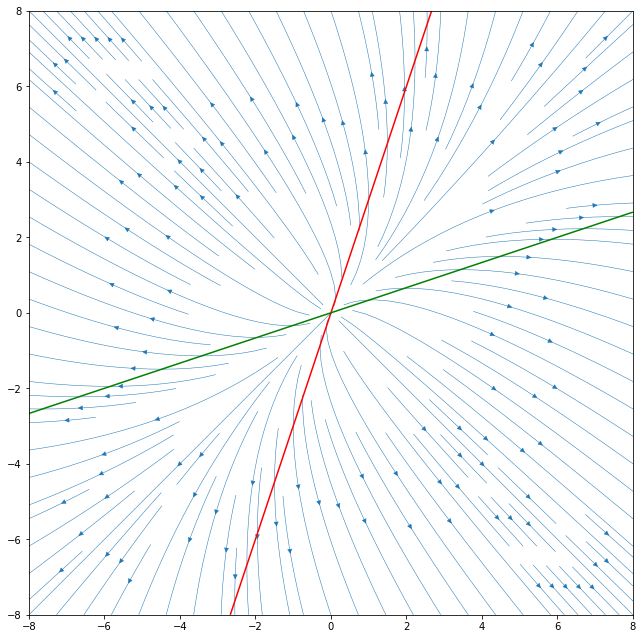

In [39]:
'''
Further simplification of the phase plane plot function
as published by Dominik Krzeminski (dokato) at
https://gist.github.com/dokato/68c122f6508461cad91e245a93be9eaf

Author: E. Dronkert https://github.com/ednl
'''
import numpy as np
import matplotlib.pyplot as plt

def phase_plane_plot(model, range1=(-1, 1), range2=None, points=None, size=800):
    '''
    model  = 2x2 matrix (Numpy array) representing a system of coupled ODEs
    range1 = range of x1 (tuple)
    range2 = range of x2 (tuple), same as range1 if not provided
    points = number of points in linspace of range x1 and x2, 5 per unit if not provided
    size   = size of the plot in pixels
    '''
    if range2 is None:
        range2 = range1
    if points is None:
        points = (range1[1] - range1[0]) * 5 + 1

    x1, x2 = np.meshgrid(
        np.linspace(range1[0], range1[1], points),
        np.linspace(range2[0], range2[1], points))  # grid matrices filled with values of x1 and x2
    xdot = np.zeros((points, points, 2))  # matrix of vectors
    
    for i1 in range(points):
        for i2 in range(points):
            xdot[i1, i2] = model @ [x1[i1, i2], x2[i1, i2]]  # dot product of matrix and vector

    px = 1 / plt.rcParams['figure.dpi']
    plt.subplots(figsize=(size*px, size*px))
    plt.streamplot(x1, x2, xdot[:, :, 0], xdot[:, :, 1], linewidth=0.5, density=1.5)
    plt.contour(x1, x2, xdot[:, :, 0], [0], colors = 'r')
    plt.contour(x1, x2, xdot[:, :, 1], [0], colors = 'g')
    plt.axis('square')
    plt.axis([range1[0], range1[1], range2[0], range2[1]])
    plt.show()

A = np.array([[3, -1], [-1, 3]])
phase_plane_plot(A, range1=(-8, 8))